# Reliability and reproducibility: [Gut microbial diversity analysis of women with polycystic ovary syndrome (PCOS)](https://academic.oup.com/jcem/advance-article-abstract/doi/10.1210/jc.2017-02153/4822208?redirectedFrom=fulltext)


###### Pedro J. Torres  <pjtorres88@gmail.com>

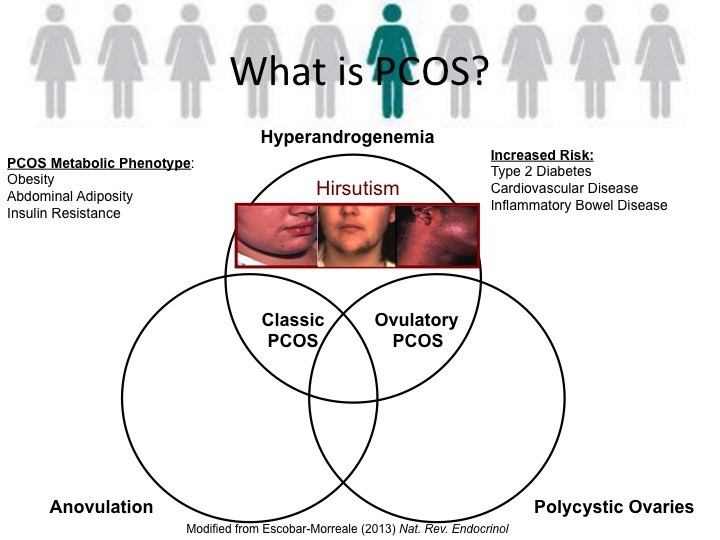

In [28]:
display_png(file="pcos.jpg")  

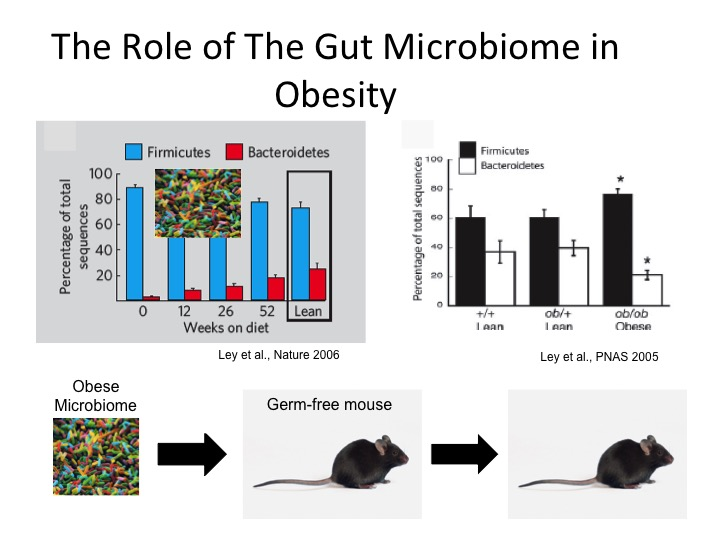

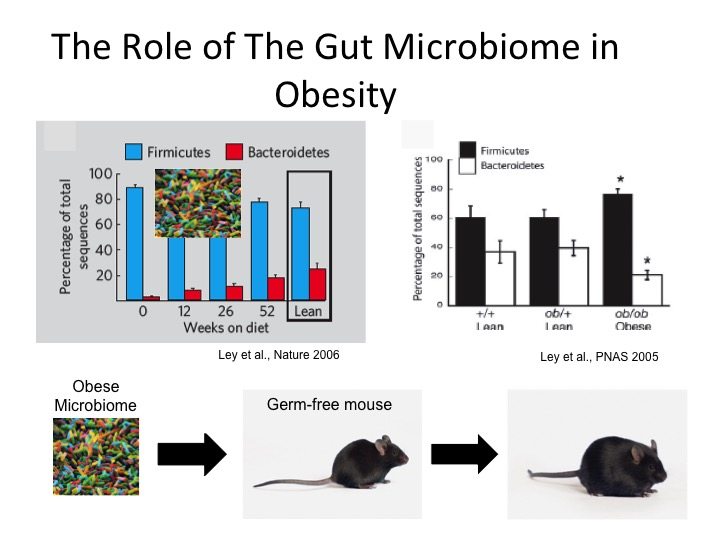

In [31]:
display_png(file="lean.jpg") 
display_png(file="obese.jpg") 



In [23]:
# Install and load R pakcages that are necessary for the analysis - Packages are collections of R functions, data, - 
# and compiled code in a well-defined format. Remove the hash sign to download and install the packages.

#source('http://bioconductor.org/biocLite.R')
#biocLite('phyloseq')
library("phyloseq")
packageVersion("phyloseq")

#biocLite("biomformat")
library("biomformat")
packageVersion("biomformat")

#install.packages("ggplot2")
library("ggplot2")
packageVersion("ggplot2")

library("IRdisplay")
packageVersion('IRdisplay')

#install.packages("vegan")
library("vegan")
packageVersion('vegan')

#install.packages("grid")
library("grid")
packageVersion('grid')

[1] ‘1.19.1’

[1] ‘1.2.0’

[1] ‘2.2.1’

[1] ‘0.4.4’

[1] ‘2.4.6’

[1] ‘3.4.1’

# Load and format data for phyloseq. There are 3 important files: 1. [BIOM table](http://biom-format.org/),  2. Mapping file, 3. Phylogenetic tree 

In [95]:
biom_data <- import_biom(BIOMfilename = "filtered-table-with-taxonomy-n2-rmsamplev2json.biom", 
                         treefilename = "tree.nwk")
mapping_file <- import_qiime_sample_data(mapfilename = "phyloseqmap.txt")

In [96]:
# Merge the OTU and mapping data into a phyloseq object
phylo <- merge_phyloseq(biom_data, mapping_file)
#check phyloseq objects
colnames(tax_table(phylo))= c("Kingdom","Phylum","Class","Order","Family","Genus", "Species")
rank_names(phylo)

[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

In [97]:
#number of samples
nsamples(phylo)
# number of otus
ntaxa(phylo)
#summary statistics of sampling depth
depths <- sample_sums(phylo)
summary(depths)

[1] 158

[1] 481

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    843    2392    4358    4569    6356   10737 

In [98]:
#rarefy datasset to even depth and set the sed. THe sed 
set.seed(123)
pcosrarefied = rarefy_even_depth(phylo, rngseed=1, sample.size=0.9*min(sample_sums(phylo)), replace=F)

`set.seed(1)` was used to initialize repeatable random subsampling.
Please record this for your records so others can reproduce.
Try `set.seed(1); .Random.seed` for the full vector
...


In [99]:
#----check that everything was rarefied evenly----------
#summary statistics of sampling depth
head(sample_sums(pcosrarefied))



1 100 101 102 103 104 
758 758 758 758 758 758

# Alpha Diversity - Microbial Richness (Faith's PD, Pieloue, Observed OTUS, Shannon)


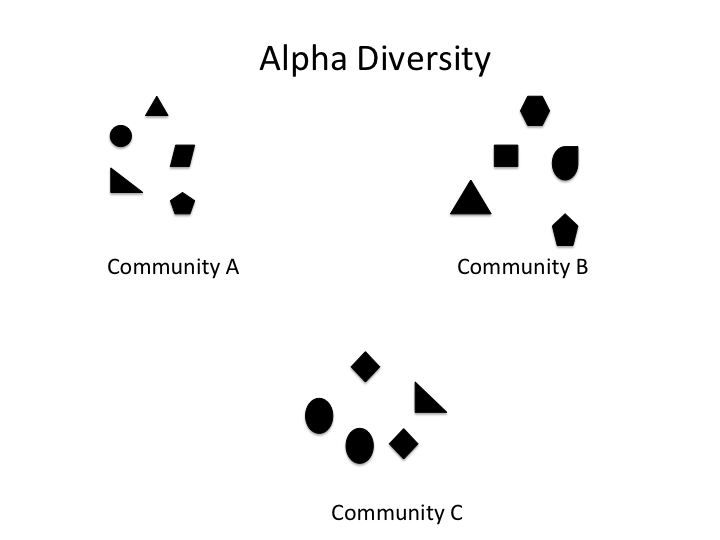

In [11]:
display_png(file="alpha.png")  

In [100]:
# make data frame out of mapping file in phyloseq
mapping_file = as(sample_data(phylo), "data.frame")

In [101]:
# Compare the different alpha diversity metrics of women with PCOS vs PCOM vs Control
# we will create a factor for our categorical variable. Essentially you have a sequence of data elements and you want
# R to treat them as a factor, which is R's term for categorical variable

mapping_file$PCOS_Control_PCOM=factor(mapping_file$PCOS_Control_PCOM)
summary((mapping_file$PCOS_Control_PCOM))

Control    PCOM    PCOS 
     47      41      70


	Shapiro-Wilk normality test

data:  faith_pd
W = 0.97234, p-value = 0.002906


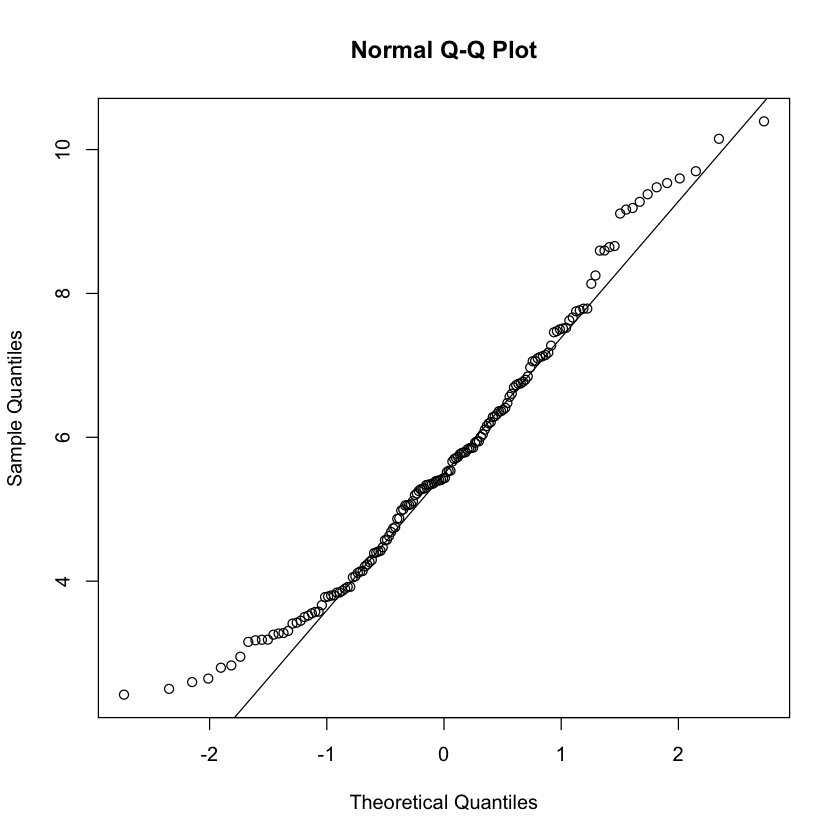

In [102]:
# is the data normaly distributed?
# faith_pd
#The Shapiro–Wilk test tests the null hypothesis that a sample x1,.., xn came from a normally distributed population.

with(mapping_file, shapiro.test(faith_pd))#reject null hypothesis that data is normally distributed
with(mapping_file, qqnorm(faith_pd))
with(mapping_file, qqline(faith_pd))

#if you have trouble running this just run the following script
#mapping_file$faith_pd=as.numeric(mapping_file$faith_pd)

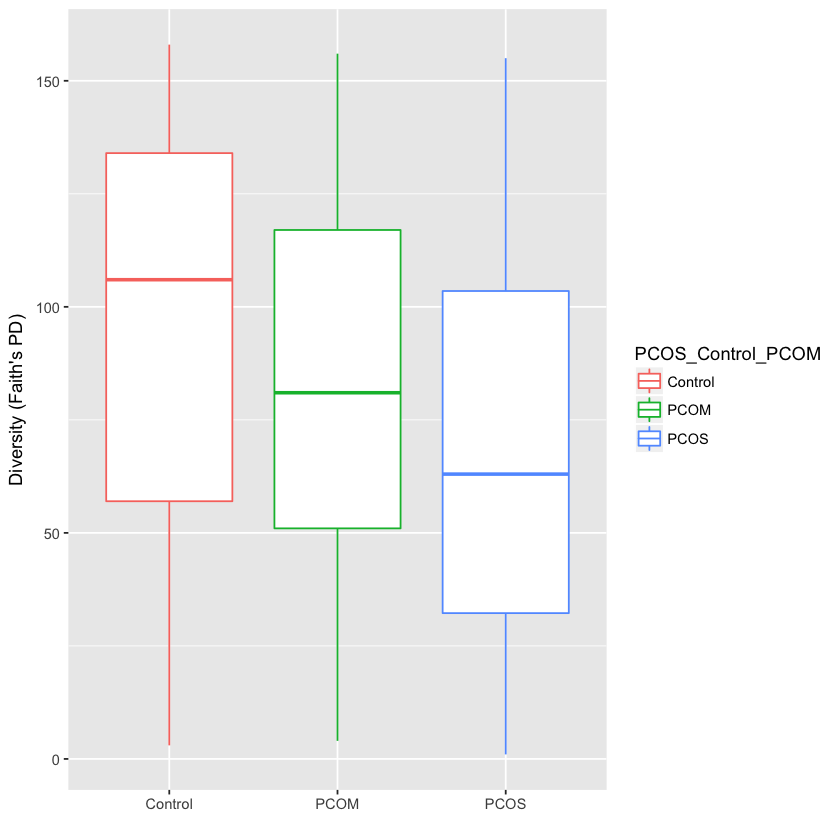

In [103]:
# Create Box plots
box1_all=ggplot(mapping_file, aes(x=PCOS_Control_PCOM, y=rank(faith_pd)))+geom_boxplot(mapping= aes(color=PCOS_Control_PCOM))+labs(x="", y="Diversity (Faith's PD)")
box1_all

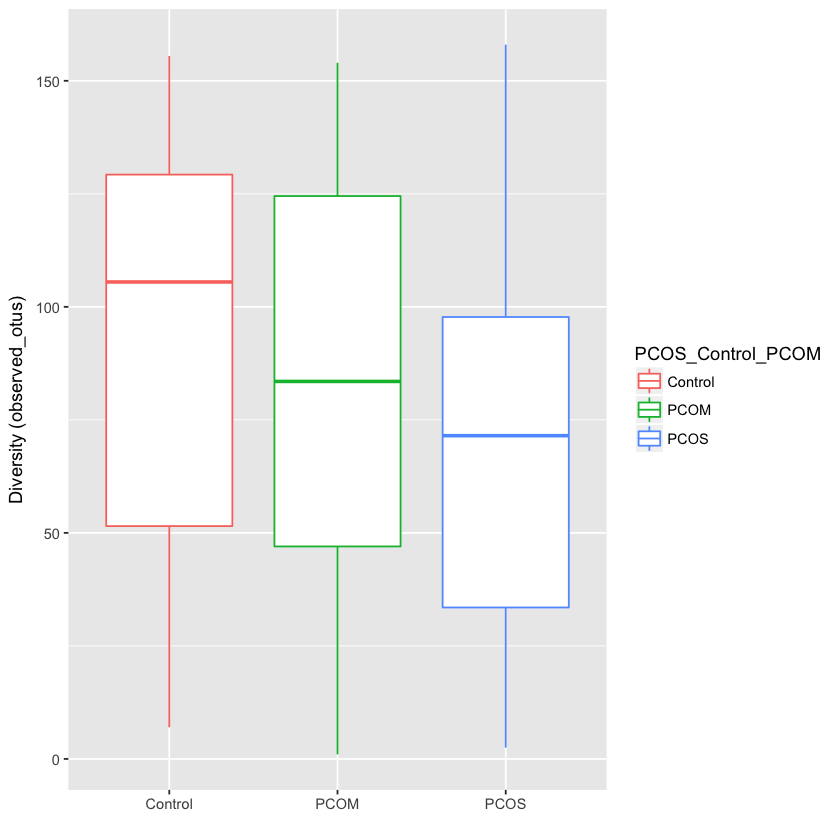

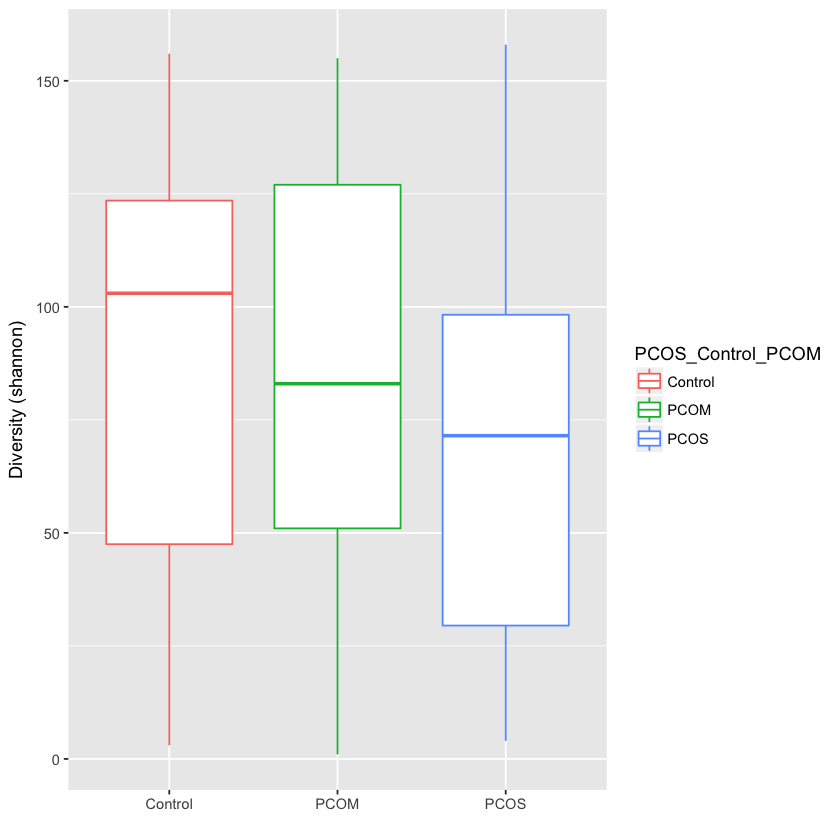

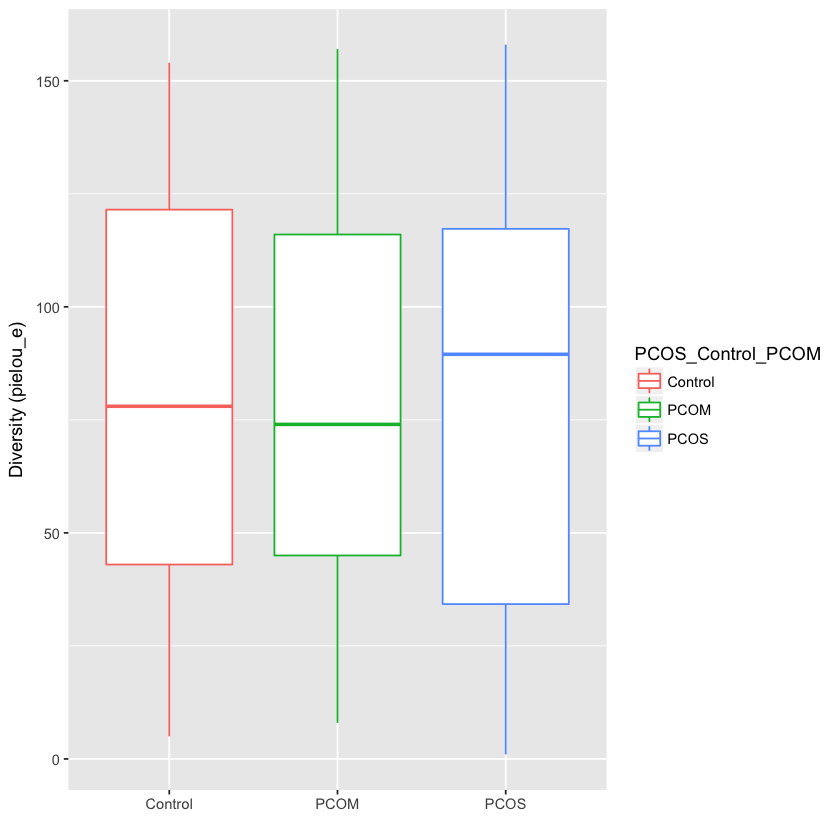

In [104]:
#observed_otus
ggplot(mapping_file, aes(x=PCOS_Control_PCOM, y=rank(observed_otus)))+geom_boxplot(mapping= aes(color=PCOS_Control_PCOM))+labs(x="", y="Diversity (observed_otus)")

#shannon
ggplot(mapping_file, aes(x=PCOS_Control_PCOM, y=rank(shannon)))+geom_boxplot(mapping= aes(color=PCOS_Control_PCOM))+labs(x="", y="Diversity (shannon)")

#pielou_e
ggplot(mapping_file, aes(x=PCOS_Control_PCOM, y=rank(pielou_e)))+geom_boxplot(mapping= aes(color=PCOS_Control_PCOM))+labs(x="", y="Diversity (pielou_e)")

# Looks different, but is there a significant difference between populations? Which groups are different? (ANOVA)

In [105]:
print ("Faith's PD")
faiths=aov(rank(faith_pd)~PCOS_Control_PCOM, data=mapping_file)
summary(faiths)

print ("Observed_otus")
observed=aov(rank(observed_otus)~PCOS_Control_PCOM, data=mapping_file)
summary(observed)



# The p-value is less than 0.05, so we reject the null hypothesis, and conclude that at least one of the 3 
# groups has a mean different from the other groups. Which  groups differ from the other groups?

[1] "Faith's PD"


                   Df Sum Sq Mean Sq F value Pr(>F)  
PCOS_Control_PCOM   2  14320    7160    3.53 0.0317 *
Residuals         155 314359    2028                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Observed_otus"


                   Df Sum Sq Mean Sq F value Pr(>F)  
PCOS_Control_PCOM   2  12851    6425   3.156 0.0454 *
Residuals         155 315608    2036                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# After doing an ANOVA, a significant p-value tells us that at least one of the groups is different from the other groups. However, it doesn’t tell us which group or groups are different. One-way to see which treatment groups are different is to do pairwise t-tests among all pairs of treatments. If we do all possible pairwise contrasts of groups, we could do a large number of tests (this case only 3), and increase the risk of a type I error (false positive) just because of the multiple comparisons we perform. 

# False positive results: The multiple comparison problem
## Treatment contrasts compare treatments to one specific reference level. Suppose  that instead of 3 groups we were comparing we doubled it to do all possible pairwise comparisons of a 6 treatment group using a t-test for each comparison. We would do 6*5/2 = 15 pairwise comparisons, meaning 15 t-tests. If each t-test has a false positive probability of alpha = 0.05, we have a high risk of getting a false positive result. 15 * 0.05 expected to come out a significant by chance.

In [106]:
TukeyHSD(x=faiths,conf.level=0.95)
TukeyHSD(x=observed,conf.level=0.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rank(faith_pd) ~ PCOS_Control_PCOM, data = mapping_file)

$PCOS_Control_PCOM
                   diff       lwr       upr     p adj
PCOM-Control -14.170213 -36.94447  8.604041 0.3069962
PCOS-Control -22.555927 -42.65327 -2.458584 0.0236103
PCOS-PCOM     -8.385714 -29.34441 12.572980 0.6115464


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rank(observed_otus) ~ PCOS_Control_PCOM, data = mapping_file)

$PCOS_Control_PCOM
                   diff       lwr        upr     p adj
PCOM-Control  -8.059938 -30.87939 14.7595143 0.6813669
PCOS-Control -20.876140 -41.01337 -0.7389105 0.0402442
PCOS-PCOM    -12.816202 -33.81649  8.1840871 0.3208987


# Multiple Regression
## Multiple regression can tell us which variables, if any, are effective predictors of the response (alpha diversity). Then what we can do is break down the results into individual or subset variables that were effective predictors of the response. This allows us to get a better understanding and visualization of the data. Comprehension is easier when you can see what is happening.

In [107]:
full.fpd= lm(rank(faith_pd)~PCOS_Control_PCOM+BMI+ Hirsutism +Age+ Testosterone_ng_mL + Oligomenorrhea+ Hyperandrogenism+ Polycystic_Ovarian_Morphology+LH_FSH_ratio+Menses_per_year+FSH+LH+PRL+TSH+Test0_ng_mL+DHEAS, data=mapping_file)
a=step(full.fpd, data=mapping_file, direction="backward")
summary(a)

Start:  AIC=1210.27
rank(faith_pd) ~ PCOS_Control_PCOM + BMI + Hirsutism + Age + 
    Testosterone_ng_mL + Oligomenorrhea + Hyperandrogenism + 
    Polycystic_Ovarian_Morphology + LH_FSH_ratio + Menses_per_year + 
    FSH + LH + PRL + TSH + Test0_ng_mL + DHEAS

                                Df Sum of Sq    RSS    AIC
- TSH                            1      17.9 266936 1208.3
- Oligomenorrhea                 1     100.7 267019 1208.3
- Age                            1     340.7 267259 1208.5
- DHEAS                          1     342.0 267260 1208.5
- FSH                            1     564.6 267483 1208.6
- Test0_ng_mL                    1    1083.1 268001 1208.9
- Testosterone_ng_mL             1    1282.8 268201 1209.0
- LH                             1    1324.7 268243 1209.0
- BMI                            1    2345.3 269263 1209.7
- PRL                            1    2616.6 269535 1209.8
<none>                                       266918 1210.3
- Menses_per_year             


Call:
lm(formula = rank(faith_pd) ~ PCOS_Control_PCOM + Hirsutism + 
    Testosterone_ng_mL + Hyperandrogenism + Polycystic_Ovarian_Morphology + 
    LH_FSH_ratio + Menses_per_year, data = mapping_file)

Residuals:
   Min     1Q Median     3Q    Max 
-93.13 -30.93   0.55  34.76  91.99 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               218.742     38.026   5.752 4.83e-08
PCOS_Control_PCOMPCOM                     -76.249     32.887  -2.319 0.021782
PCOS_Control_PCOMPCOS                    -133.501     37.818  -3.530 0.000553
Hirsutism                                  -2.642      1.236  -2.136 0.034281
Testosterone_ng_mL                        -52.076     24.247  -2.148 0.033355
HyperandrogenismNo_Hyperandrogenism       -72.460     19.247  -3.765 0.000239
Polycystic_Ovarian_MorphologyPCO_ovaries   58.681     31.307   1.874 0.062836
LH_FSH_ratio                                5.866      3.156   1.859 0.06

In [119]:
full.fpd= lm(rank(observed_otus)~PCOS_Control_PCOM+BMI+ Hirsutism +Age+ Testosterone_ng_mL + Oligomenorrhea+ Hyperandrogenism+ Polycystic_Ovarian_Morphology+LH_FSH_ratio+Menses_per_year+FSH+LH+PRL+TSH+Test0_ng_mL+DHEAS, data=mapping_file)
a=step(full.fpd, data=mapping_file, direction="backward")
summary(a)

Start:  AIC=1214.48
rank(observed_otus) ~ PCOS_Control_PCOM + BMI + Hirsutism + Age + 
    Testosterone_ng_mL + Oligomenorrhea + Hyperandrogenism + 
    Polycystic_Ovarian_Morphology + LH_FSH_ratio + Menses_per_year + 
    FSH + LH + PRL + TSH + Test0_ng_mL + DHEAS

                                Df Sum of Sq    RSS    AIC
- PRL                            1       0.1 274128 1212.5
- DHEAS                          1     182.8 274311 1212.6
- TSH                            1     364.8 274492 1212.7
- Age                            1     839.8 274968 1213.0
- LH                             1    1025.3 275153 1213.1
- FSH                            1    1139.6 275267 1213.1
- BMI                            1    1490.3 275618 1213.3
- Oligomenorrhea                 1    1596.2 275724 1213.4
- Polycystic_Ovarian_Morphology  1    2014.8 276142 1213.6
- Test0_ng_mL                    1    2747.7 276875 1214.1
- Testosterone_ng_mL             1    3208.7 277336 1214.3
<none>                   


Call:
lm(formula = rank(observed_otus) ~ PCOS_Control_PCOM + Hirsutism + 
    Testosterone_ng_mL + Hyperandrogenism + Polycystic_Ovarian_Morphology + 
    LH_FSH_ratio + Menses_per_year, data = mapping_file)

Residuals:
   Min     1Q Median     3Q    Max 
-86.95 -34.63   4.08  33.57  78.15 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               205.826     38.546   5.340 3.41e-07
PCOS_Control_PCOMPCOM                     -56.863     33.337  -1.706  0.09014
PCOS_Control_PCOMPCOS                    -105.070     38.335  -2.741  0.00688
Hirsutism                                  -2.177      1.253  -1.737  0.08443
Testosterone_ng_mL                        -67.671     24.579  -2.753  0.00663
HyperandrogenismNo_Hyperandrogenism       -60.021     19.510  -3.076  0.00249
Polycystic_Ovarian_MorphologyPCO_ovaries   45.266     31.735   1.426  0.15585
LH_FSH_ratio                                5.353      3.199   1.673

# It looks like testosterone, hirsutism and hypernadrogenism are strong predictors of alpha diversity (Faith's PD and Observed OTUs). Patterns become much clearer in a linear regression because we are only considering two variables now our x predictor and y response . 


Call:
lm(formula = rank(faith_pd) ~ Testosterone_ng_mL, data = mapping_file)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.522 -37.258   0.617  39.518  83.805 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          94.258      8.309  11.344   <2e-16 ***
Testosterone_ng_mL  -34.944     17.723  -1.972   0.0504 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.34 on 156 degrees of freedom
Multiple R-squared:  0.02432,	Adjusted R-squared:  0.01806 
F-statistic: 3.888 on 1 and 156 DF,  p-value: 0.05041


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Testosterone_ng_mL,1,7991.949,7991.949,3.887722,0.05040888
Residuals,156,320687.551,2055.689,NA,NA


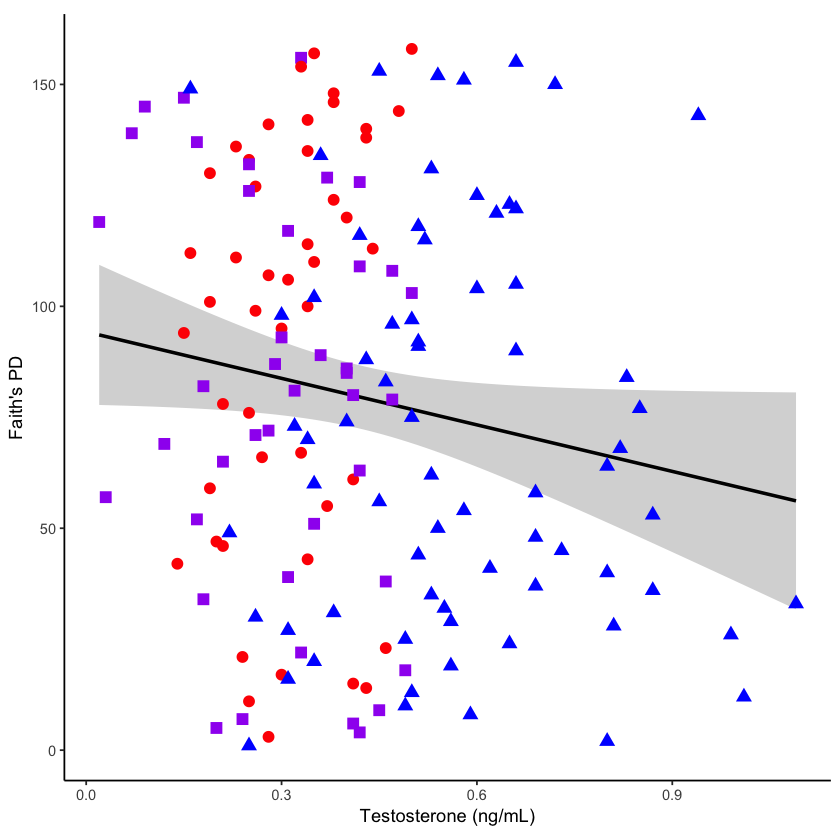


Call:
lm(formula = rank(faith_pd) ~ Hirsutism, data = mapping_file)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.879 -36.701   2.176  36.864  84.368 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  89.8786     6.0605  14.830   <2e-16 ***
Hirsutism    -1.9315     0.9073  -2.129   0.0348 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.25 on 156 degrees of freedom
Multiple R-squared:  0.02823,	Adjusted R-squared:  0.022 
F-statistic: 4.531 on 1 and 156 DF,  p-value: 0.03485


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Hirsutism,1,9277.807,9277.807,4.531403,0.0348486
Residuals,156,319401.693,2047.447,NA,NA


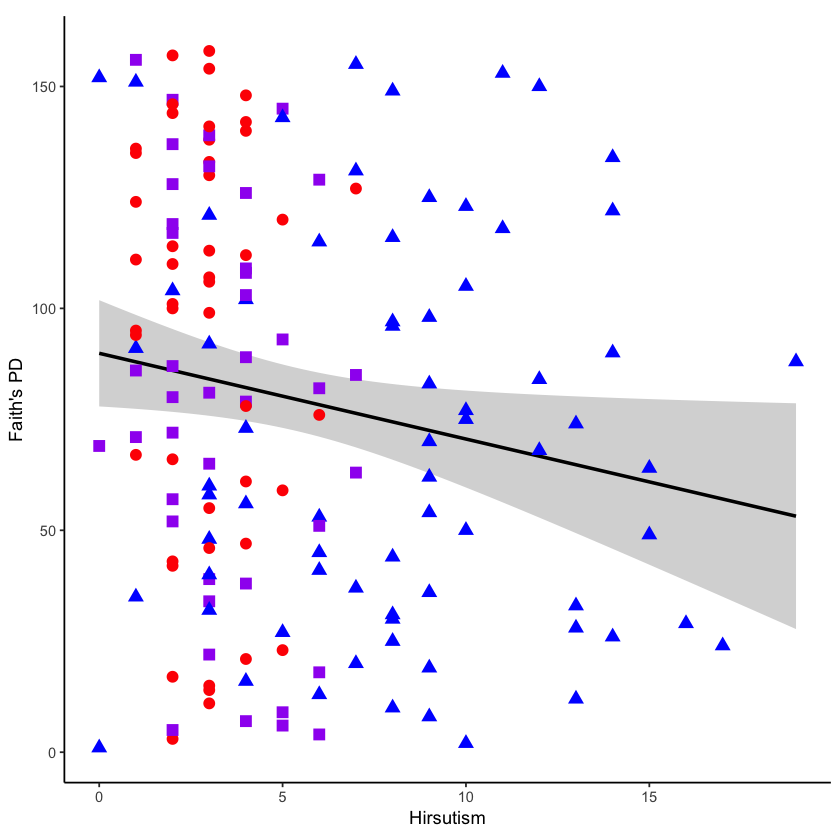

In [120]:
ggplot(mapping_file,aes(x=Testosterone_ng_mL, y=rank(faith_pd)))+stat_smooth(method="lm", col="black")+
  labs(x="Testosterone (ng/mL)", y="Faith's PD")+ 
  theme(legend.position="none")+theme(aspect.ratio = 1)+  geom_point(aes(color=PCOS_Control_PCOM, shape=factor(PCOS_Control_PCOM)),size=3)+
  scale_shape_manual(values = c(16, 15,17))+scale_color_manual(values=c("red","purple","blue"))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                                       panel.background = element_blank(), axis.line = element_line(colour = "black"))

# is there a significant correlation between faiths pd and Testosterone levels
faith_pd.lmt= lm(rank(faith_pd)~Testosterone_ng_mL, data=mapping_file)
summary(faith_pd.lmt)
anova(faith_pd.lmt)

ggplot(mapping_file,aes(x=Hirsutism, y=rank(faith_pd)))+stat_smooth(method="lm", col="black")+
  labs(x="Hirsutism", y="Faith's PD")+ 
  theme(legend.position="none")+theme(aspect.ratio = 1)+  geom_point(aes(color=PCOS_Control_PCOM, shape=factor(PCOS_Control_PCOM)),size=3)+
  scale_shape_manual(values = c(16, 15,17))+scale_color_manual(values=c("red","purple","blue"))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                                       panel.background = element_blank(), axis.line = element_line(colour = "black"))

# is there a significant correlation between faiths pd and hirsutism levels

faith_pd.lmt= lm(rank(faith_pd)~Hirsutism, data=mapping_file)
summary(faith_pd.lmt)
anova(faith_pd.lmt)


Call:
lm(formula = rank(observed_otus) ~ Testosterone_ng_mL, data = mapping_file)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.479 -36.097   4.353  39.357  90.468 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         100.279      8.204  12.224  < 2e-16 ***
Testosterone_ng_mL  -49.199     17.498  -2.812  0.00556 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.77 on 156 degrees of freedom
Multiple R-squared:  0.04823,	Adjusted R-squared:  0.04213 
F-statistic: 7.905 on 1 and 156 DF,  p-value: 0.005562


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Testosterone_ng_mL,1,15842.11,15842.114,7.905426,0.005561803
Residuals,156,312616.89,2003.954,NA,NA


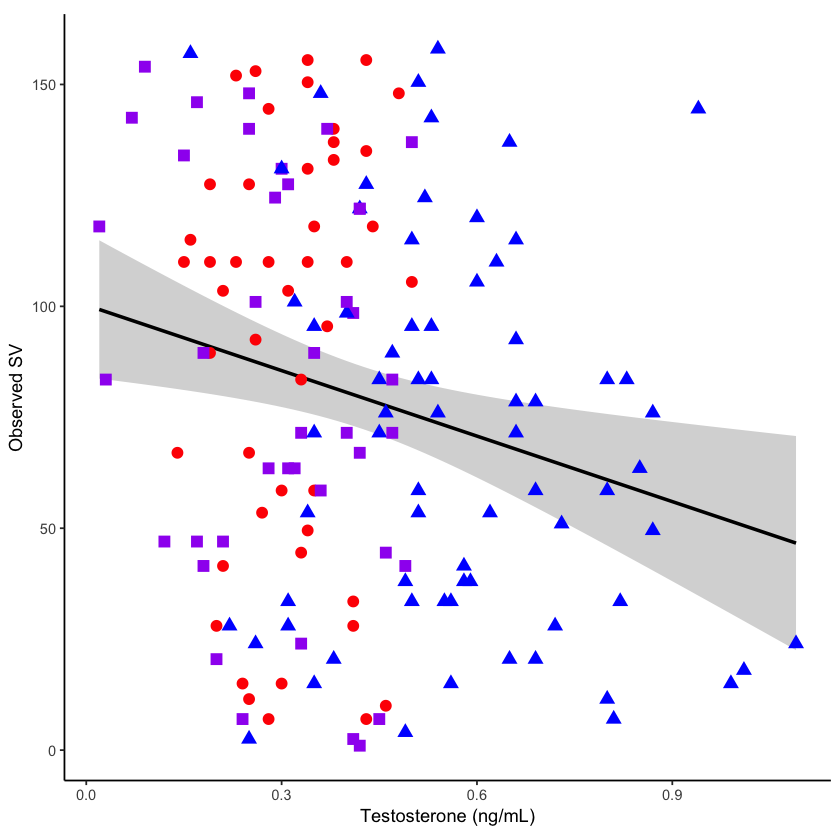


Call:
lm(formula = rank(observed_otus) ~ Hirsutism, data = mapping_file)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.864 -37.179  -1.168  37.555  85.941 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  90.3636     6.0500  14.936   <2e-16 ***
Hirsutism    -2.0217     0.9058  -2.232    0.027 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.17 on 156 degrees of freedom
Multiple R-squared:  0.03095,	Adjusted R-squared:  0.02474 
F-statistic: 4.982 on 1 and 156 DF,  p-value: 0.02703


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Hirsutism,1,10165.3,10165.302,4.98215,0.02703467
Residuals,156,318293.7,2040.344,NA,NA


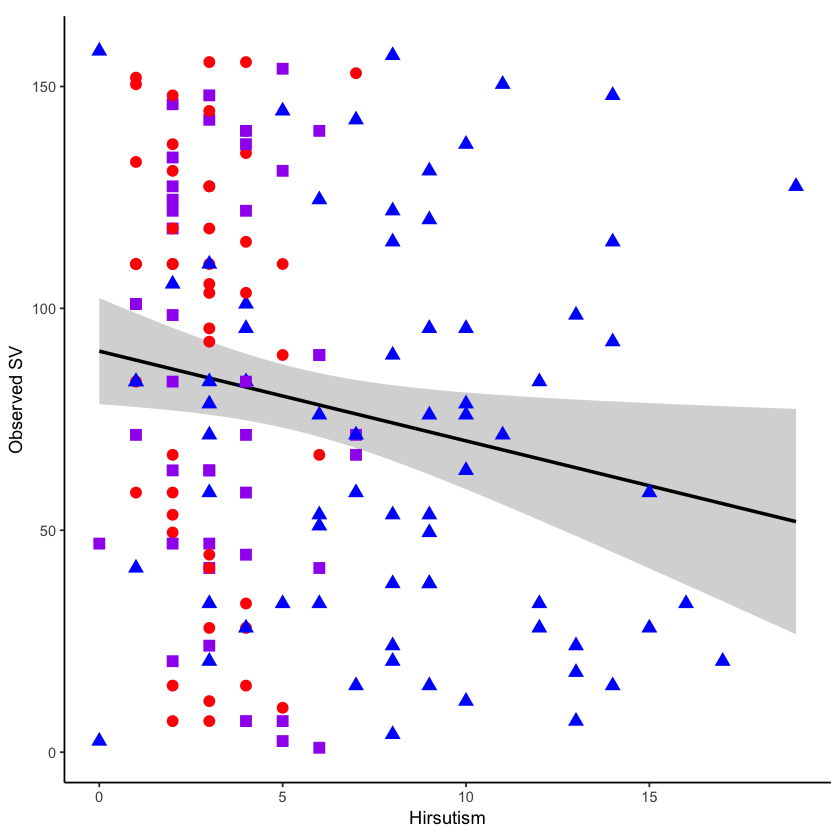

In [121]:
ggplot(mapping_file,aes(x=Testosterone_ng_mL, y=rank(observed_otus)))+stat_smooth(method="lm", col="black")+
  labs(x="Testosterone (ng/mL)", y="Observed SV")+ 
  theme(legend.position="none")+theme(aspect.ratio = 1)+  geom_point(aes(color=PCOS_Control_PCOM, shape=factor(PCOS_Control_PCOM)),size=3)+
  scale_shape_manual(values = c(16, 15,17))+scale_color_manual(values=c("red","purple","blue"))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                                       panel.background = element_blank(), axis.line = element_line(colour = "black"))

faith_pd.lmt= lm(rank(observed_otus)~Testosterone_ng_mL, data=mapping_file)
summary(faith_pd.lmt)
anova(faith_pd.lmt)

ggplot(mapping_file,aes(x=Hirsutism, y=rank(observed_otus)))+stat_smooth(method="lm", col="black")+
  labs(x="Hirsutism", y="Observed SV")+ 
  theme(legend.position="none")+theme(aspect.ratio = 1)+  geom_point(aes(color=PCOS_Control_PCOM, shape=factor(PCOS_Control_PCOM)),size=3)+
  scale_shape_manual(values = c(16, 15,17))+scale_color_manual(values=c("red","purple","blue"))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                                       panel.background = element_blank(), axis.line = element_line(colour = "black"))

faith_pd.lmt= lm(rank(observed_otus)~Hirsutism, data=mapping_file)
summary(faith_pd.lmt)
anova(faith_pd.lmt)

# Beta Diversity - microbial community composition. PCOA plots and  for data exploration and visualization of  dissimilarities in the data and thus hypothesis generating. 

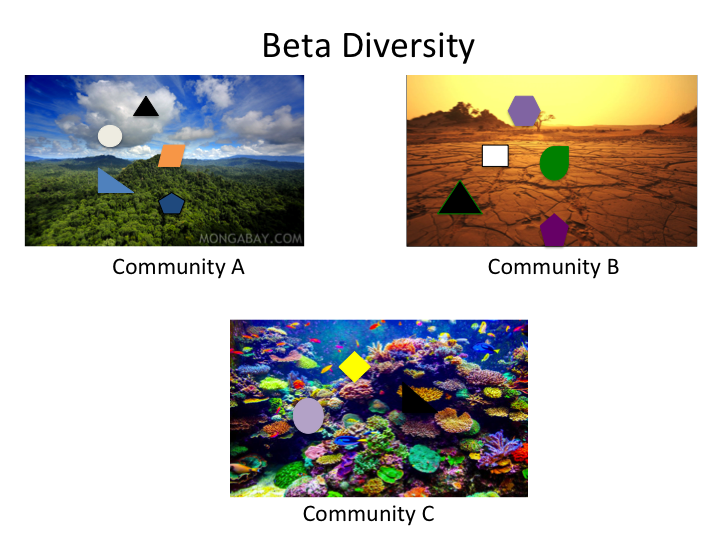

In [2]:
display_png(file="beta.png")  

## PCOM has remained intermediate phenotype, so to see real differences we will focus on the two extremes PCOS and Control



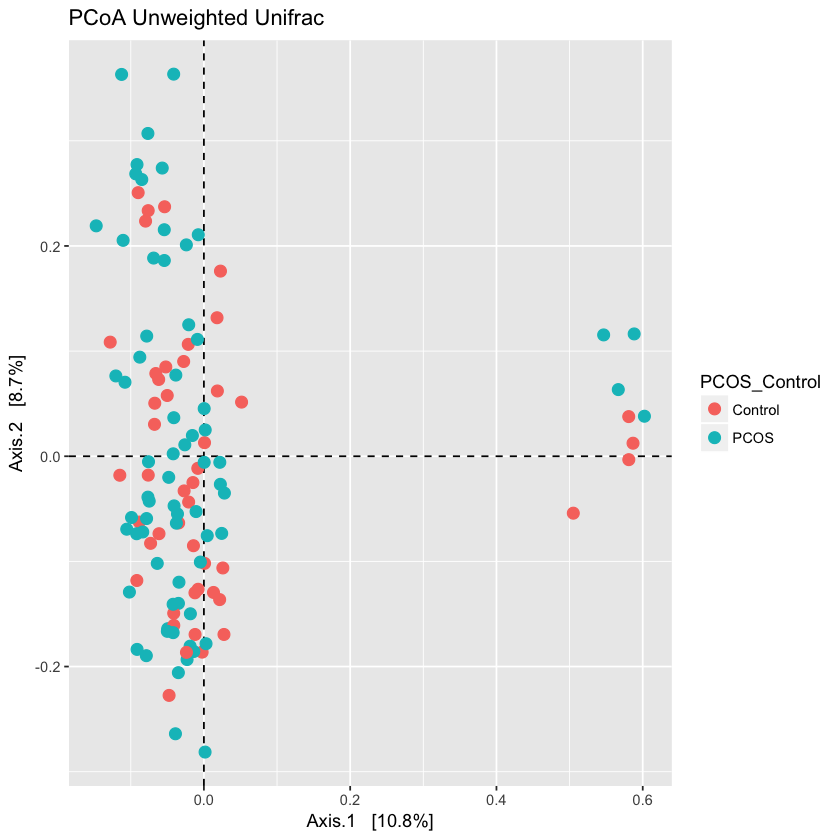

In [117]:
pcosrarefied=subset_samples(pcosrarefied, PCOS_Control != 'PCOM')
pcoa.mds.uwuni <- ordinate(physeq = pcosrarefied, method = "PCoA", distance="unifrac")
p.pcoa.uwuni=plot_ordination(
  physeq = pcosrarefied, 
  ordination = pcoa.mds.uwuni, 
  color = "PCOS_Control"
) + geom_hline(yintercept=0, linetype=2) + geom_vline(xintercept=0,linetype=2)+
  geom_point(size = 3) + 
  ggtitle("PCoA Unweighted Unifrac")
p.pcoa.uwuni

## That is why we explore the data. we see a very different cluster of a set of patients. Do not know why this is so we will filter these out as we continue our analysis.

In [ ]:
pcos.rare.nout=subset_samples(pcosrarefied,  X.SampleID != "93" & X.SampleID != "80" & X.SampleID != "39" & X.SampleID != "145" & X.SampleID != "172" & X.SampleID != "157" & X.SampleID != "163" & X.SampleID !="138")

pcoa.mds.uwuni <- ordinate(physeq = pcos.rare.nout, method = "PCoA", distance="unifrac")
p.pcoa.uwuni=plot_ordination(
  physeq = pcosrarefied, 
  ordination = pcoa.mds.uwuni, 
  color = "PCOS_Control"
) + geom_hline(yintercept=0, linetype=2) + geom_vline(xintercept=0,linetype=2)+
  geom_point(size = 3) + 
  ggtitle("PCoA Unweighted Unifrac")
p.pcoa.uwuni

## PERMANOVA allows us to see the effect that these variables have on the dataset. We can ask a similar question to the alpha diversity and regression models: what patient clinical parameter could be driving microbial composition?

In [122]:
df = as(sample_data(pcos.rare.nout), "data.frame")
d = phyloseq::distance(pcos.rare.nout, "unifrac", weighted=FALSE)

#test for homogeneity of data
sampledf <- data.frame(sample_data(pcos.rare.nout))
beta <- betadisper(d, sampledf$Hyperandrogenism)
permutest(beta)

set.seed(2)
GPNMDS = ordinate(pcos.rare.nout, "PCoA", d)
a=adonis(d ~ PCOS_Control_PCOM+LH+FSH+Age+BMI+Hirsutism+Testosterone_ng_mL+Menses_per_year+Hyperandrogenism+Polycystic_Ovarian_Morphology+Oligomenorrhea, as(sample_data(pcos.rare.nout), "data.frame"), permutations=10000, method='unifrac', weighted=FALSE)
a$aov.tab



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups      1 0.00041 0.0004129 0.0932    999  0.778
Residuals 106 0.46972 0.0044313                     

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
PCOS_Control_PCOM,1,0.3135070,0.3135070,1.3828461,0.012798439,0.06239376
LH,1,0.2596136,0.2596136,1.1451280,0.010598323,0.23717628
FSH,1,0.1906608,0.1906608,0.8409844,0.007783431,0.74542546
Age,1,0.2306521,0.2306521,1.0173818,0.009416014,0.41585841
BMI,1,0.1802625,0.1802625,0.7951187,0.007358937,0.81991801
Hirsutism,1,0.1957316,0.1957316,0.8633512,0.007990439,0.70242976
Testosterone_ng_mL,1,0.2457238,0.2457238,1.0838617,0.010031295,0.31126887
Menses_per_year,1,0.2227226,0.2227226,0.9824059,0.009092307,0.47745225
Hyperandrogenism,1,0.4637271,0.4637271,2.0454507,0.018930939,0.00139986
Polycystic_Ovarian_Morphology,1,0.2180577,0.2180577,0.9618292,0.008901867,0.50005000


# CCA - We can hypothesis that the bacterial communities structure in these women is associated with androgen levels. CCA allows us to describe and visualize if an environmental variable or combination of, are strongly related to community composition. 

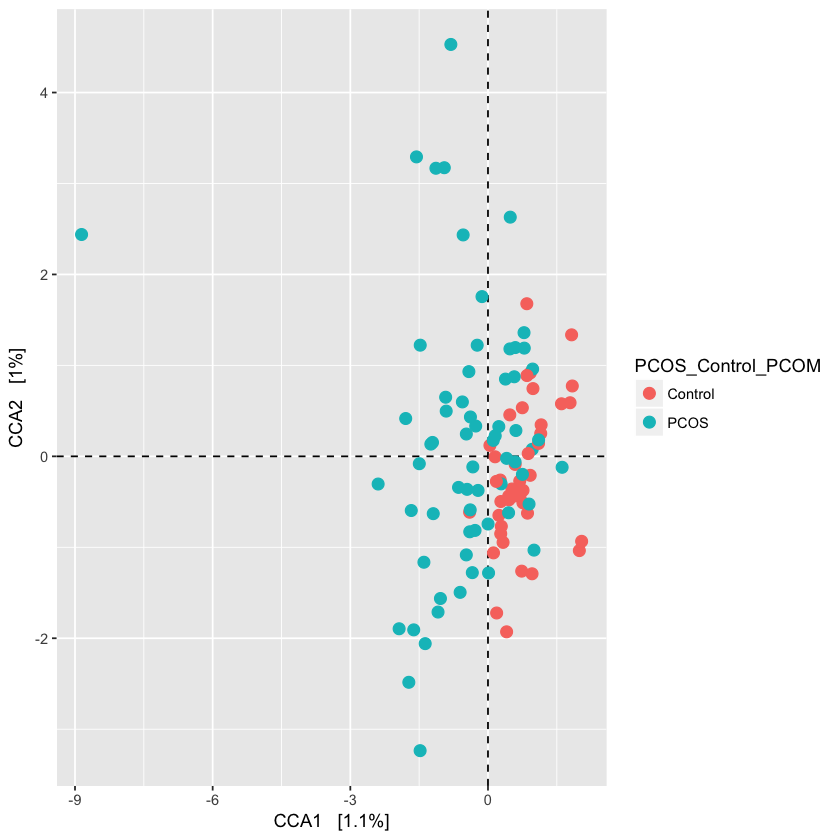

In [130]:
cca_lit = ordinate(pcos.rare.nout, ~ Hirsutism+Hyperandrogenism+Testosterone_ng_mL , method="CCA", distance = "unifrac")
p0 = plot_ordination(pcos.rare.nout, cca_lit, color = "PCOS_Control_PCOM")+ geom_hline(yintercept=0, linetype=2) + geom_vline(xintercept=0,linetype=2)+
  geom_point(size = 3) 
p0

Warning message:
“Ignoring unknown aesthetics: shape, label”Warning message:
“Ignoring unknown aesthetics: shape”

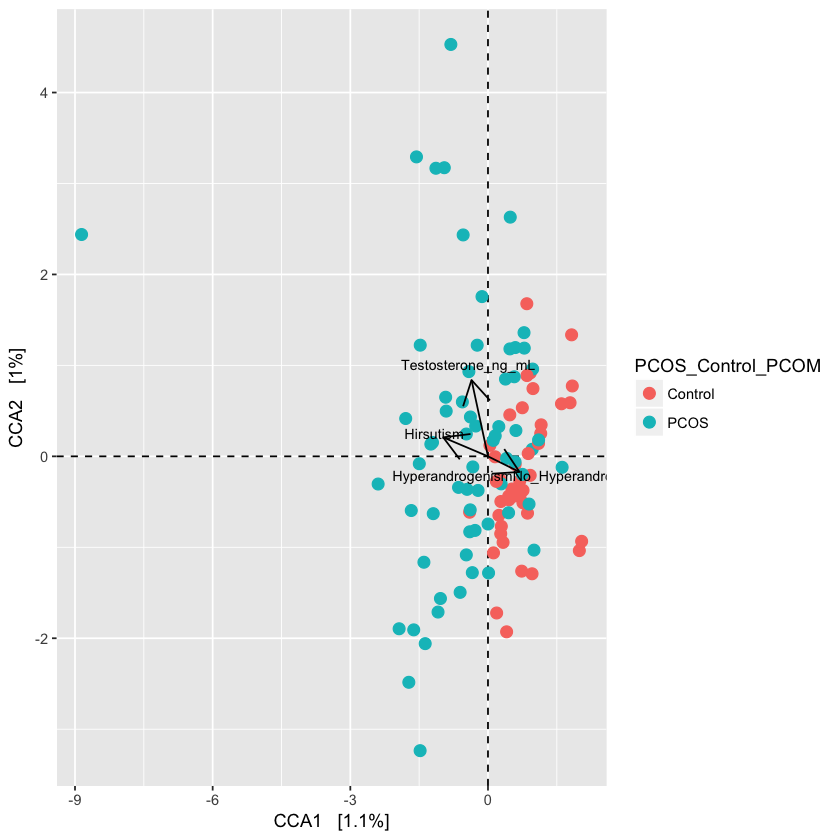

In [131]:
# Now add the environmental variables as arrows
arrowmat = vegan::scores(cca_lit, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map = aes(xend = CCA1, yend = CCA2, x = 0, y = 0, shape = NULL, color = NULL, 
                label = labels)
label_map = aes(x = 1.2 * CCA1, y = 1.2 * CCA2, shape = NULL, color = NULL, 
                label = labels)
# Make a new graphic
arrowhead = arrow(length = unit(0.05, "npc"))
p1 = p0 + geom_segment(arrow_map, size = 0.5, data = arrowdf, color = "black", 
                       arrow = arrowhead) + geom_text(label_map, size = 3, data = arrowdf)
p1

arrowdf = transform(arrowdf, radians = atan(CCA2/CCA1))
arrowdf = transform(arrowdf, angle = 360 * radians/(2 * pi))
# Quadrants II, III, IV
arrowdf$quad234 <- apply(arrowdf[, c("CCA1", "CCA2")], 1, function(x) {
  any(x < 0)
})
arrowdf$quad4 <- apply(arrowdf[, c("CCA1", "CCA2")], 1, function(x) {
  all(x < 0)
})